### Clustering restuarants

In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import scipy
from scipy import stats

In [4]:
df_restuarants = pd.read_csv('yelp_dataset/restaurant_features.csv')

In [5]:
df_restuarants.columns

Index(['Unnamed: 0', 'business_id', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'avg_rating',
       'review_id', 'useful', 'funny', 'cool', 'median_rating',
       'RestaurantsTakeOut', 'BusinessParking', 'BusinessAcceptsCreditCards',
       'RestaurantsPriceRange2', 'RestaurantsDelivery'],
      dtype='object')

In [6]:
df_restuarants_numeric = df_restuarants._get_numeric_data()
df_restuarants_numeric
df_restuarants_numeric_transformed = pd.DataFrame()
for column in df_restuarants_numeric:
    df_restuarants_numeric_transformed[column] = (df_restuarants_numeric[column] - df_restuarants_numeric[column].min()) / (df_restuarants_numeric[column].max() - df_restuarants_numeric[column].min())    
  

In [7]:
df_restuarants_numeric_transformed[df_restuarants_numeric_transformed.columns[1:12]]

,latitude,longitude,stars,review_count,is_open,avg_rating,review_id,useful,funny,cool,median_rating
0,0.474485,0.989120,0.750,0.009917,1.0,0.764368,0.010694,0.008956,0.005815,0.006722,0.750
1,0.489139,0.982161,0.875,0.001058,1.0,0.923077,0.001043,0.000137,0.000000,0.000000,1.000
2,0.333342,0.727060,0.250,0.000132,1.0,0.291667,0.000130,0.000000,0.000000,0.000000,0.125
3,0.421245,0.655242,0.500,0.001851,0.0,0.486842,0.001826,0.001436,0.001113,0.000283,0.750
4,0.330987,0.733461,0.125,0.000661,1.0,0.175000,0.000652,0.000137,0.000247,0.000000,0.000
...,...,...,...,...,...,...,...,...,...,...,...
64611,0.614632,0.083638,0.750,0.003702,1.0,0.698529,0.003782,0.002324,0.001732,0.001274,1.000
64612,0.185531,0.201237,0.875,0.004760,1.0,0.837209,0.004956,0.005880,0.000619,0.001415,1.000
64613,0.473737,0.989051,0.875,0.003967,1.0,0.878571,0.003912,0.001641,0.001113,0.000637,1.000
64614,0.470682,0.983128,0.875,0.001190,1.0,0.857143,0.001174,0.001436,0.000619,0.001061,1.000


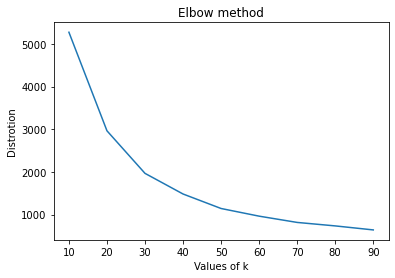

In [8]:
distortions=[]
for k in range(1, 100, 10):
    kmeans = KMeans(n_clusters=k, random_state=11465209).fit(df_restuarants_numeric_transformed[df_restuarants_numeric_transformed.columns[1:12]])
    distortions.append(kmeans.inertia_)
    
plt.plot(range(10,100,10), distortions[1:])
plt.xlabel("Values of k")
plt.ylabel("Distrotion")
plt.title("Elbow method")
plt.show()

In [9]:
from itertools import combinations 
  
list_of_columns_all = range(0,len(df_restuarants_numeric_transformed.columns))
list_of_columns_non_nulls = range(3,12)
comb = combinations(list_of_columns_non_nulls, 3) 
  
distortions_test=[]
combinations =[]
# Print the obtained combinations 
for i in list(comb): 
    kmeans = KMeans(n_clusters=30, random_state=11465209).fit(df_restuarants_numeric_transformed.iloc[:, list(i)])
    distortions_test.append(kmeans.inertia_)
    combinations.append(i)

In [10]:
min_distortion_index=0
for i in range(len(distortions_test)):
    features = list(combinations[i])
    for i in features:
        print(df_restuarants_numeric_transformed.columns[i])
    if(distortions_test[i]<distortions_test[min_distortion_index]):
        min_distortion_index=i
    print(distortions_test[i])
    print()

print("Minimum distortion")
print(distortions_test[min_distortion_index])
for i in combinations[min_distortion_index]:
        print(df_restuarants_numeric_transformed.columns[i])

stars
review_count
is_open
3.052255400612216

stars
review_count
avg_rating
17.89700716595448

stars
review_count
review_id
28.142279256835465

stars
review_count
useful
5.7049403326867125

stars
review_count
funny
2.067404969091358

stars
review_count
cool
0.9762791207153835

stars
review_count
median_rating
0.5807655335106505

stars
is_open
avg_rating
17.89700716595448

stars
is_open
review_id
28.142279256835465

stars
is_open
useful
5.7049403326867125

stars
is_open
funny
2.067404969091358

stars
is_open
cool
0.9762791207153835

stars
is_open
median_rating
0.5807655335106505

stars
avg_rating
review_id
28.142279256835465

stars
avg_rating
useful
5.7049403326867125

stars
avg_rating
funny
2.067404969091358

stars
avg_rating
cool
0.9762791207153835

stars
avg_rating
median_rating
0.5807655335106505

stars
review_id
useful
5.7049403326867125

stars
review_id
funny
2.067404969091358

stars
review_id
cool
0.9762791207153835

stars
review_id
median_rating
0.5807655335106505

stars
useful


In [11]:
df_restuarants_numeric_transformed['cluster'] = kmeans.fit_predict(df_restuarants_numeric_transformed[["stars","useful","median_rating"]])


/var/folders/k_/ppnmkyj13nvc74dj067xh0m40000gn/T/ipykernel_56619/3035060344.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


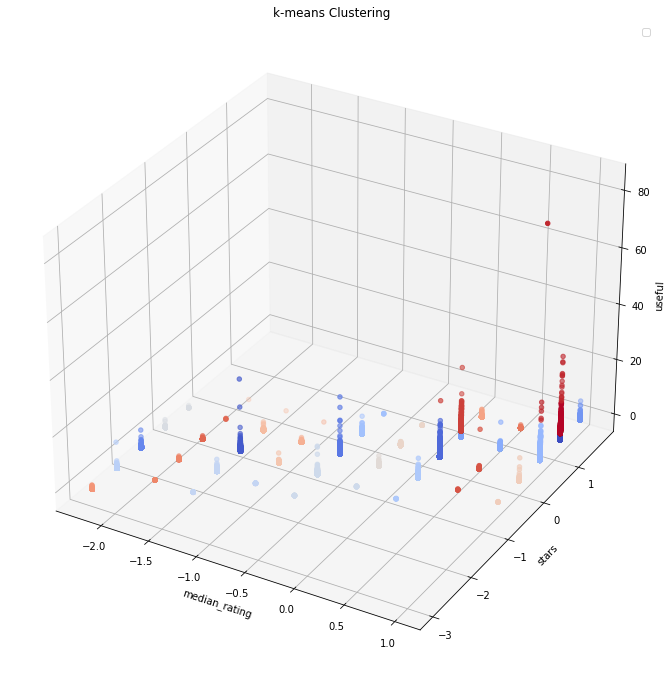

In [12]:
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)
y = stats.zscore(df_restuarants_numeric_transformed["stars"])
x = stats.zscore(df_restuarants_numeric_transformed["median_rating"])
z = stats.zscore(df_restuarants_numeric_transformed["useful"])
c = df_restuarants_numeric_transformed['cluster']
ax.scatter(x,y,z, c=c, cmap='coolwarm')
plt.title('k-means Clustering')
ax.set_ylabel('stars')
ax.set_xlabel('median_rating')
ax.set_zlabel('useful')
plt.legend()